In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from eod import EodHistoricalData
from tqdm import tqdm

In [3]:
API_KEY = ''
client = EodHistoricalData(API_KEY)

## SHEL

In [3]:
competitors = ['XOM', 'CVX', 'SHEL', 'TTE', 'EQNR']

In [4]:
df = pd.DataFrame()

for c in tqdm(competitors):
    tmp = pd.DataFrame(client.get_prices_eod(c, period='d', order='a', from_='2010-01-01'))
    tmp.set_index(pd.to_datetime(tmp.date), inplace=True)
    df[c] = tmp.adjusted_close


100%|██████████| 5/5 [00:07<00:00,  1.43s/it]


In [5]:
df_log = np.log(df) - np.log(df.shift(1))

In [13]:
df_log['2015-04-01':].std()

XOM     0.018446
CVX     0.019995
SHEL    0.021083
TTE     0.019618
EQNR    0.022692
dtype: float64

In [14]:
df['2015-04-01':].pct_change().std()

XOM     0.018444
CVX     0.019876
SHEL    0.020949
TTE     0.019493
EQNR    0.022571
dtype: float64

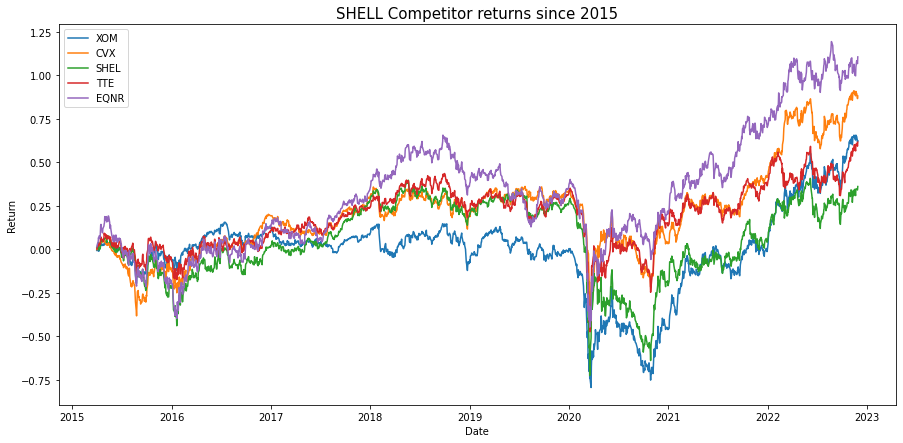

In [6]:
fig, ax = plt.subplots(figsize=(15,7), facecolor='white')

ax.plot(df_log['2015-04-01':].cumsum(), label=df_log.columns)

ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.set_title("SHELL Competitor returns since 2015", size=15)
ax.legend()

## WMT 

In [14]:
competitors = ['WMT', 'COST', 'HD', 'LOW', 'TGT', 'WMK'] #, 'PSMT', 'CVS']

In [15]:
df = pd.DataFrame()

for c in tqdm(competitors):
    tmp = pd.DataFrame(client.get_prices_eod(c+'.US', period='d', order='a', from_='2010-01-01'))
    tmp.set_index(pd.to_datetime(tmp.date), inplace=True)
    df[c] = tmp.adjusted_close


100%|██████████| 6/6 [00:07<00:00,  1.33s/it]


In [16]:
df_log = np.log(df) - np.log(df.shift(1))

In [17]:
df_log.resample('1w').last()['2017-11':].std()

WMT     0.012291
COST    0.016760
HD      0.015149
LOW     0.016747
TGT     0.016966
WMK     0.019065
dtype: float64

<AxesSubplot: xlabel='date'>

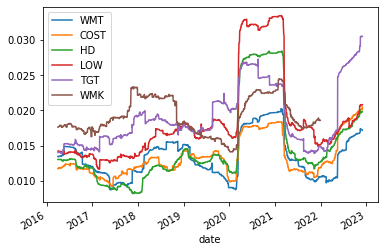

In [18]:
df_log['2015-04-01':].rolling(252).std().plot()

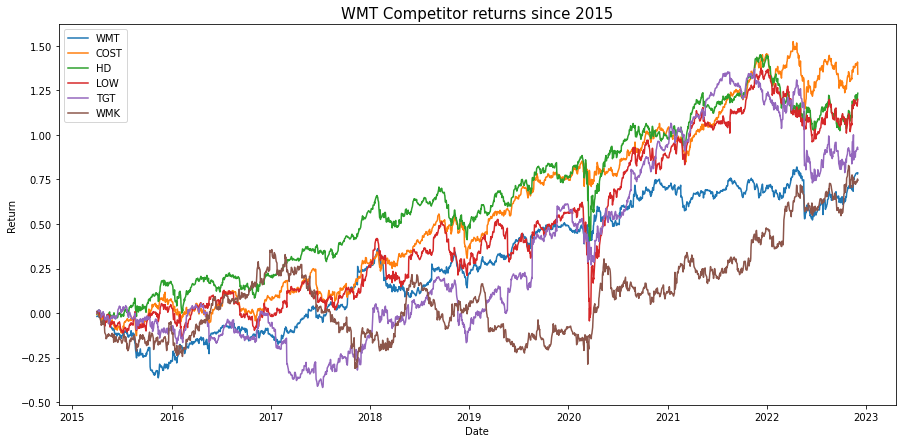

In [19]:
fig, ax = plt.subplots(figsize=(15,7), facecolor='white')

ax.plot(df_log['2015-04-01':].cumsum(), label=df_log.columns)

ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.set_title("WMT Competitor returns since 2015", size=15)
ax.legend()